In [1]:
# Enabling print for all lines
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Checking the working directory
import os
os.getcwd()

'C:\\Users\\Administrator\\Python_work\\Edureka'

In [2]:
import pandas as pd

# to_datetime() automatically infers a date/time format based on the input
pd.to_datetime('2018-01-15 3:45pm')

Timestamp('2018-01-15 15:45:00')

In [3]:
# The ambiguous date '7/8/1952' is assumed to be month/day/year and is interpreted as July 8, 1952
pd.to_datetime('7/8/1952')

Timestamp('1952-07-08 00:00:00')

In [5]:
# We can use the dayfirst parameter to tell pandas to interpret the date as August 7, 1952
pd.to_datetime('7/8/1952', dayfirst=True)

Timestamp('1952-08-07 00:00:00')

In [6]:
# If we supply a list or array of strings as input to to_datetime(), it returns a sequence of date/time values in a
# DatetimeIndex object
pd.to_datetime(['2018-01-05', '7/8/1952', 'Oct 10, 1995'])

DatetimeIndex(['2018-01-05', '1952-07-08', '1995-10-10'], dtype='datetime64[ns]', freq=None)

In [7]:
# We use format codes %m (numeric month), %d (day of month), and %y (2-digit year) to specify the format
pd.to_datetime(['2/25/10', '8/6/17', '12/15/12'], format='%m/%d/%y')

DatetimeIndex(['2010-02-25', '2017-08-06', '2012-12-15'], dtype='datetime64[ns]', freq=None)

In [13]:
# Creating a time series data frame
opsd_daily = pd.read_csv('opsd_germany_daily.csv')
opsd_daily.shape
opsd_daily.info()

(4383, 11)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         4383 non-null   object 
 1   Consumption  4383 non-null   float64
 2   Wind         2920 non-null   float64
 3   Solar        2188 non-null   float64
 4   Wind+Solar   2187 non-null   float64
 5   Unnamed: 5   0 non-null      float64
 6   Unnamed: 6   0 non-null      float64
 7   Unnamed: 7   0 non-null      float64
 8   Unnamed: 8   0 non-null      float64
 9   Unnamed: 9   0 non-null      float64
 10  Unnamed: 10  0 non-null      float64
dtypes: float64(10), object(1)
memory usage: 376.8+ KB


In [15]:
# Now that the Date column is the correct data type, let’s set it as the DataFrame’s index
opsd_daily = opsd_daily.set_index('Date').drop('Unnamed: 5','Unnamed: 6','Unnamed: 7','Unnamed: 8','Unnamed: 9','Unnamed: 10')
opsd_daily.head(3)

ValueError: For argument "inplace" expected type bool, received type str.

In [17]:
# We can consolidate the above steps into a single line, using the index_col and parse_dates parameters of the read_csv() function
opsd_daily = pd.read_csv('opsd_germany_daily.csv', index_col=0, parse_dates=True)
opsd_daily.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4383 entries, 2006-01-01 to 2017-12-31
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Consumption  4383 non-null   float64
 1   Wind         2920 non-null   float64
 2   Solar        2188 non-null   float64
 3   Wind+Solar   2187 non-null   float64
 4   Unnamed: 5   0 non-null      float64
 5   Unnamed: 6   0 non-null      float64
 6   Unnamed: 7   0 non-null      float64
 7   Unnamed: 8   0 non-null      float64
 8   Unnamed: 9   0 non-null      float64
 9   Unnamed: 10  0 non-null      float64
dtypes: float64(10)
memory usage: 376.7 KB


In [18]:
# Add columns with year, month, and weekday name
opsd_daily['Year'] = opsd_daily.index.year
opsd_daily['Month'] = opsd_daily.index.month
opsd_daily['Weekday Name'] = opsd_daily.index.weekday_name

# Display a random sampling of 5 rows
opsd_daily.sample(5, random_state=0)

AttributeError: 'DatetimeIndex' object has no attribute 'weekday_name'

In [19]:
# Indexing
opsd_daily.loc['2017-08-10']

Consumption    1351.491
Wind            100.274
Solar            71.160
Wind+Solar      171.434
Unnamed: 5          NaN
Unnamed: 6          NaN
Unnamed: 7          NaN
Unnamed: 8          NaN
Unnamed: 9          NaN
Unnamed: 10         NaN
Year           2017.000
Month             8.000
Name: 2017-08-10 00:00:00, dtype: float64

In [20]:
opsd_daily.loc['2014-01-20':'2014-01-22']

,Consumption,Wind,Solar,Wind+Solar,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Year,Month
Date,,,,,,,,,,,,
2014-01-20,1590.687,78.647,6.371,85.018,NaN,NaN,NaN,NaN,NaN,NaN,2014,1
2014-01-21,1624.806,15.643,5.835,21.478,NaN,NaN,NaN,NaN,NaN,NaN,2014,1
2014-01-22,1625.155,60.259,11.992,72.251,NaN,NaN,NaN,NaN,NaN,NaN,2014,1


In [21]:
opsd_daily.loc['2012-02']

,Consumption,Wind,Solar,Wind+Solar,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Year,Month
Date,,,,,,,,,,,,
2012-02-01,1511.866,199.607,43.502,243.109,NaN,NaN,NaN,NaN,NaN,NaN,2012,2
2012-02-02,1563.407,73.469,44.675,118.144,NaN,NaN,NaN,NaN,NaN,NaN,2012,2
2012-02-03,1563.631,36.352,46.510,82.862,NaN,NaN,NaN,NaN,NaN,NaN,2012,2
2012-02-04,1372.614,20.551,45.225,65.776,NaN,NaN,NaN,NaN,NaN,NaN,2012,2
2012-02-05,1279.432,55.522,54.572,110.094,NaN,NaN,NaN,NaN,NaN,NaN,2012,2
2012-02-06,1574.766,34.896,55.389,90.285,NaN,NaN,NaN,NaN,NaN,NaN,2012,2
2012-02-07,1615.078,100.312,19.867,120.179,NaN,NaN,NaN,NaN,NaN,NaN,2012,2
2012-02-08,1613.774,93.763,36.930,130.693,NaN,NaN,NaN,NaN,NaN,NaN,2012,2
2012-02-09,1591.532,132.219,19.042,151.261,NaN,NaN,NaN,NaN,NaN,NaN,2012,2


In [22]:
# Visualising time series

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(rc={'figure.figsize':(11, 4)})

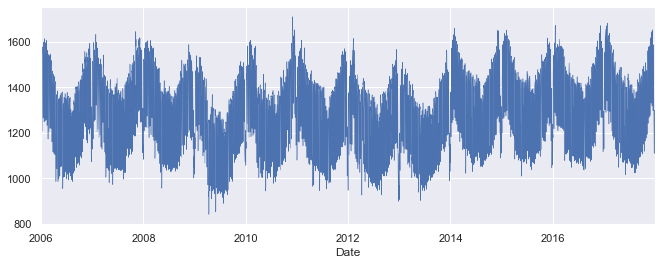

In [23]:
# Create a line plot of the full time series of Germany’s daily electricity consumption, using the DataFrame’s plot() method
opsd_daily['Consumption'].plot(linewidth=0.5);

Text(0, 0.5, 'Daily Totals (GWh)')

Text(0, 0.5, 'Daily Totals (GWh)')

Text(0, 0.5, 'Daily Totals (GWh)')

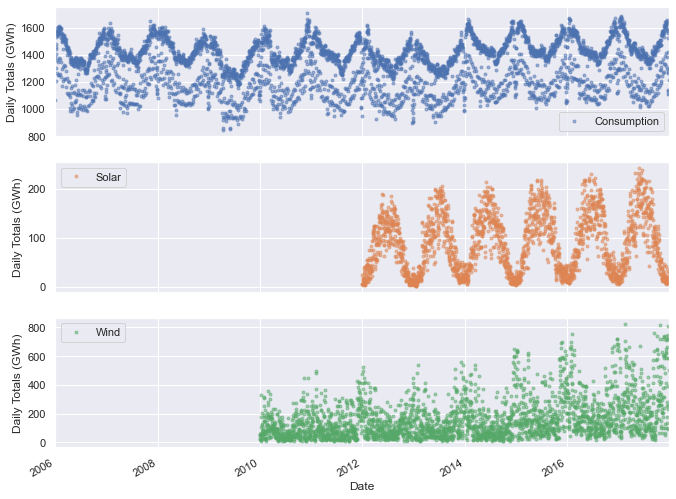

In [24]:
cols_plot = ['Consumption', 'Solar', 'Wind']
axes = opsd_daily[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily Totals (GWh)');